In [1]:
import pandas as pd
import statistics as stat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from scipy import stats
import statsmodels.api as sm

**Correlation Analysis and Plot**

In [2]:
#change directory to your data folder
diabetesData = '/Users/bailan/diabetesv2.csv'

In [3]:
diabetesData = pd.read_csv(diabetesData)
diabetesData.head()
types = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']

In [4]:
diabetesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [5]:
diabetesData.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [6]:
#drop those missing BMI data
cleanDiabetesData=diabetesData.dropna()
cleanDiabetesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    float64
 2   BloodPressure             392 non-null    float64
 3   SkinThickness             392 non-null    float64
 4   Insulin                   392 non-null    float64
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 30.6 KB


In [7]:
cleanDiabetesData.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
cleanDiabetesData.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


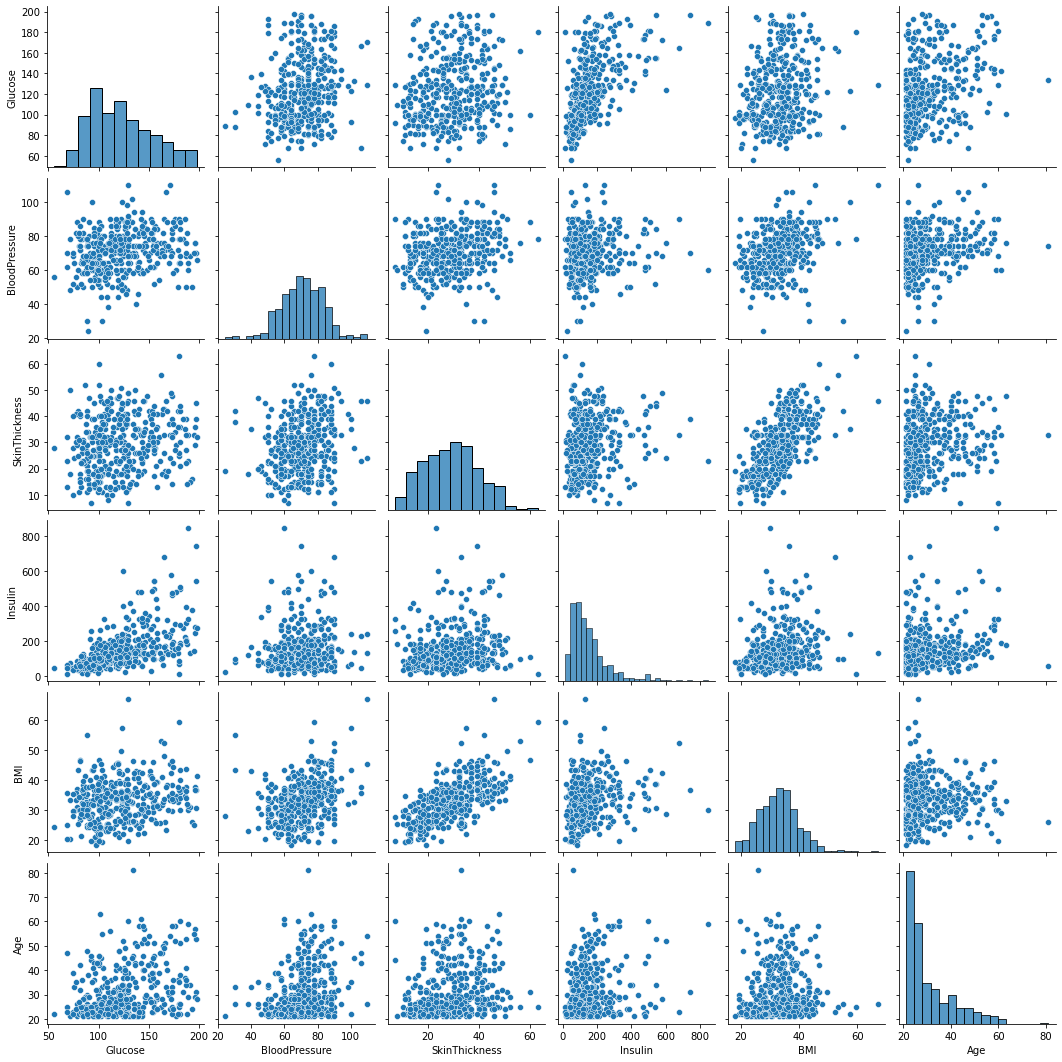

In [9]:
sns.pairplot(cleanDiabetesData[types])
plt.show()

In [10]:
# T is to transpose
cleanDiabetesDataT = cleanDiabetesData[types].T# T is to transpose
cleanDiabetesDataT

,3,4,6,8,13,14,16,18,19,20,...,744,745,747,748,751,753,755,760,763,765
Glucose,89.0,137.0,78.0,197.0,189.0,166.0,118.0,103.0,115.0,126.0,...,153.0,100.0,81.0,187.0,121.0,181.0,128.0,88.0,101.0,121.0
BloodPressure,66.0,40.0,50.0,70.0,60.0,72.0,84.0,30.0,70.0,88.0,...,88.0,84.0,74.0,70.0,78.0,88.0,88.0,58.0,76.0,72.0
SkinThickness,23.0,35.0,32.0,45.0,23.0,19.0,47.0,38.0,30.0,41.0,...,37.0,33.0,41.0,22.0,39.0,44.0,39.0,26.0,48.0,23.0
Insulin,94.0,168.0,88.0,543.0,846.0,175.0,230.0,83.0,96.0,235.0,...,140.0,105.0,57.0,200.0,74.0,510.0,110.0,16.0,180.0,112.0
BMI,28.1,43.1,31.0,30.5,30.1,25.8,45.8,43.3,34.6,39.3,...,40.6,30.0,46.3,36.4,39.0,43.3,36.5,28.4,32.9,26.2
Age,21.0,33.0,26.0,53.0,59.0,51.0,31.0,33.0,32.0,27.0,...,39.0,46.0,32.0,36.0,28.0,26.0,37.0,22.0,63.0,30.0


In [11]:
corrMatrix = np.corrcoef(cleanDiabetesDataT)

In [12]:
print(corrMatrix)

[[1.         0.21002657 0.19885582 0.58122301 0.20951592 0.3436415 ]
 [0.21002657 1.         0.23257119 0.0985115  0.30440337 0.30003895]
 [0.19885582 0.23257119 1.         0.18219906 0.66435487 0.16776114]
 [0.58122301 0.0985115  0.18219906 1.         0.22639652 0.21708199]
 [0.20951592 0.30440337 0.66435487 0.22639652 1.         0.0698138 ]
 [0.3436415  0.30003895 0.16776114 0.21708199 0.0698138  1.        ]]


([<matplotlib.axis.YTick at 0x7fb48cb7a160>,
 [Text(0, 0, 'Glucose'),
  Text(0, 1, 'BloodPressure'),
  Text(0, 2, 'SkinThickness'),
  Text(0, 3, 'Insulin'),
  Text(0, 4, 'BMI'),
  Text(0, 5, 'Age')])

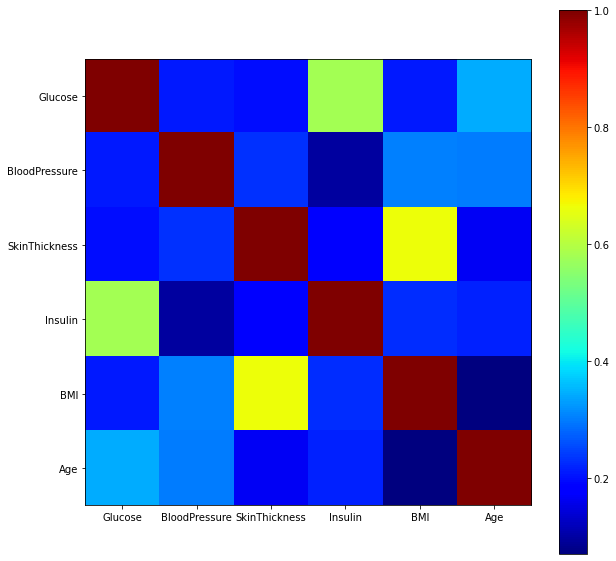

In [19]:
plt.figure(figsize = (10,10))

plt.imshow(corrMatrix,cmap='jet')

plt.colorbar()
plt.xticks(np.arange(6), types)
plt.yticks(np.arange(6), types)

**Linear Regression and Plots**

In [21]:
#change directory to your data folder
carData = '/Users/bailan/car.csv'

In [22]:
carData=pd.read_csv(carData)

In [23]:
carData.head()

,Price,Age
0,13500,23
1,13750,23
2,13950,24
3,14950,26
4,13750,30


In [24]:
carData.describe()

,Price,Age
count,1436.000000,1436.000000
mean,10730.824513,55.947075
std,3626.964585,18.599988
min,4350.000000,1.000000
25%,8450.000000,44.000000
50%,9900.000000,61.000000
75%,11950.000000,70.000000
max,32500.000000,80.000000


In [25]:
# T is to transpose, else will give out wrong output. 
#corrMatrix = np.corrcoef(carData[['Price','Age']].values.T) 
#gives the same output even not .values
corrMatrix = np.corrcoef(carData[['Price','Age']].T)
print(corrMatrix)

[[ 1.        -0.8765905]
 [-0.8765905  1.       ]]


*Using SKLearn Package*

In [26]:
ageValue=carData[['Age']]
priceValue=carData[['Price']]

In [27]:
lr = LinearRegression()
model = lr.fit(ageValue,priceValue) #fit(x,y)

In [28]:
print(model.intercept_)

[20294.05864891]


In [29]:
print(model.coef_)

[[-170.93358501]]


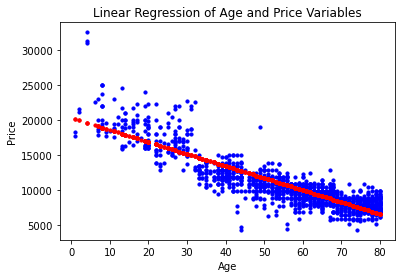

In [30]:
plt.scatter (ageValue, priceValue,s=10, c = 'blue')
plt.scatter (ageValue, model.predict(ageValue),s=10, color = 'red') #predicted model-line
plt.title ('Linear Regression of Age and Price Variables')
plt.xlabel ('Age')
plt.ylabel ('Price');

In [31]:
residual=priceValue- model.predict(ageValue)

In [36]:
np.sqrt(metrics.mean_squared_error(priceValue, lr.predict(ageValue)))# vs. std #model.predict(ageValue)

1744.8218989236718

In [33]:
metrics.r2_score(priceValue,lr.predict(ageValue))#R square

0.7684108996825327

In [37]:
#can use model.predict or lr.predict. 
#both will give the same output. 
residual2=priceValue- lr.predict(ageValue)
print(np.sqrt(metrics.mean_squared_error(priceValue, model.predict(ageValue))))
print(metrics.r2_score(priceValue,model.predict(ageValue)))

1744.8218989236718
0.7684108996825327


**Using Statsmodel**

In [38]:
trainInputData = sm.add_constant(carData[['Age']])
statsModel = sm.OLS(carData[['Price']],trainInputData )
statsModel=statsModel.fit()
print(statsModel.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4758.
Date:                Fri, 23 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:01:48   Log-Likelihood:                -12756.
No. Observations:                1436   AIC:                         2.552e+04
Df Residuals:                    1434   BIC:                         2.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.029e+04    146.097    138.908      0.0